# JWST Backgrounds

Plot predicted JWST backgrounds: 
* vs. date (for a given wavelength)
* vs. wavelength (for given dates)

https://github.com/spacetelescope/jwst_backgrounds

In [1]:
# JWST Backgrounds Tool
from jwst_backgrounds import jbt 

#jbt.get_background(ra_deg, dec_deg, 4.5, thresh=1.1, \
#                        plot_background=True, plot_bathtub=True, write_bathtub=True) 

In [2]:
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt
# https://matplotlib.org/tutorials/introductory/customizing.html
plt.style.use('http://www.stsci.edu/~dcoe/matplotlibrc.txt')
plt.rcParams.update({'figure.autolayout': False})  # messes up adjoining subplots
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
import numpy as np
import astropy
from astropy import units as u
from astropy.coordinates import SkyCoord
#from astropy.table import Table

In [4]:
import datetime

In [5]:
target = 'CEERS'
ra_dec_str = '14:19:46 +52:53:37'
ra_str, dec_str = ra_dec_str.split()
c = SkyCoord(ra_dec_str, unit=(u.hourangle, u.deg))
ra_deg  = c.ra.value
dec_deg = c.dec.value
plot_title = '%s  (%s, %s)  (%.5f, %.5f)' % (target, ra_str, dec_str, ra_deg, dec_deg)
plot_title

'CEERS  (14:19:46, +52:53:37)  (214.94167, 52.89361)'

In [6]:
def shape_len(x):
    try:
        return x.shape
    except:
        try:
            return len(x)
        except:
            return 0

In [7]:
CEERS_backgrounds = jbt.background(ra_deg, dec_deg, wavelength=4.5)
background_data = CEERS_backgrounds.bkg_data  # dict
for key in background_data.keys():
    print(shape_len(background_data[key]), key)

(204,) calendar
0 ra
0 dec
3 pos
(108,) wave_array
(108,) nonzodi_bg
(108,) thermal_bg
(204, 108) zodi_bg
(204, 108) stray_light_bg
(204, 108) total_bg


In [8]:
year = 2023  # doesn't matter much; backgrounds vary throughout the year, not much year-to-year
t0 = datetime.date(year,   1, 1)
t1 = datetime.date(year+1, 1, 1)
tt = [t0 + datetime.timedelta(days=int(d1)) for d1 in background_data['calendar']]
tt = np.array(tt)

In [9]:
wavelength1 = 5.3 # microns
i_wavelength = background_data['wave_array'].searchsorted(wavelength1)

In [10]:
date1 = datetime.datetime(2022, 12, 21)  # epoch 1
date2 = datetime.datetime(2023,  2,  9)  # epoch 2

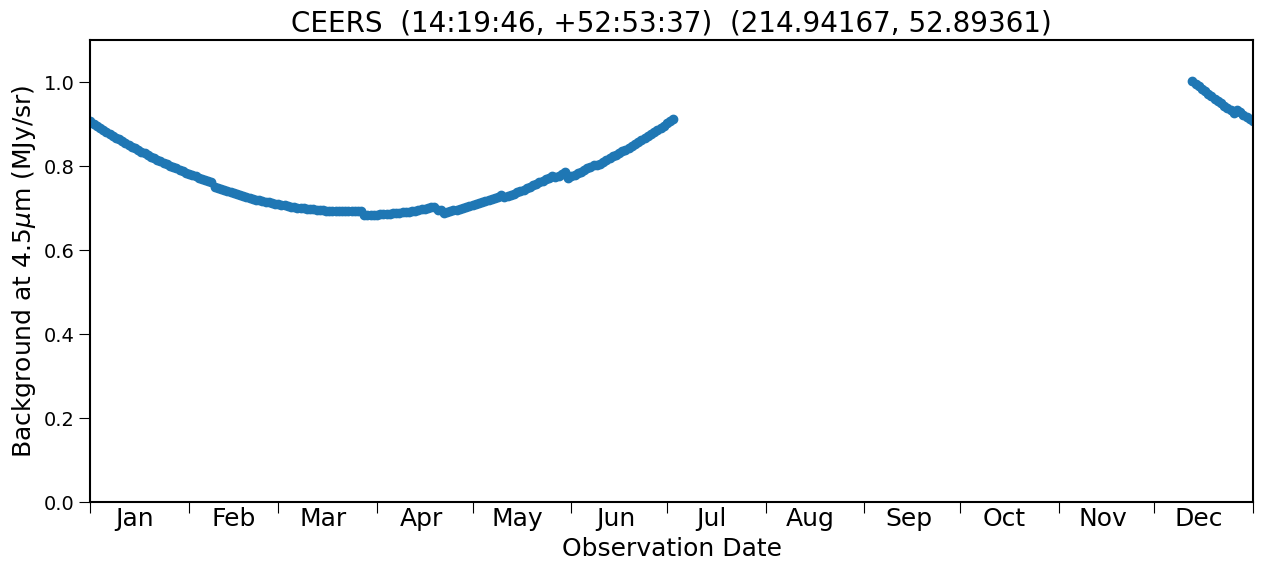

In [11]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)

ax.plot(tt, background_data['total_bg'][:,i_wavelength], 'o')

# Customize x-axis ticks and labels
ax.xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(bymonthday=1))
ax.xaxis.set_minor_locator(plt.matplotlib.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter(''))
ax.xaxis.set_minor_formatter(plt.matplotlib.dates.DateFormatter('%b'))
    
plt.tick_params(axis='x', which='minor', width=0, length=0)
# Add text labels to minor ticks
for tick in ax.xaxis.get_minor_ticks():
    tick.label1.set_fontsize(18)  # Adjust font size if necessary

plt.xlim(t0, t1)
plt.ylim(0,1.1)
plt.xlabel('Observation Date')
plt.ylabel('Background at 4.5$\mu$m (MJy/sr)')
plt.title(plot_title)
plt.savefig('background_vs_day.png')

In [12]:
wavelength = background_data['wave_array']
lam_NIRSpec = wavelength < 5.3

In [13]:
i1_day = background_data['calendar'].searchsorted(date1.timetuple().tm_yday)
i2_day = background_data['calendar'].searchsorted(date2.timetuple().tm_yday)

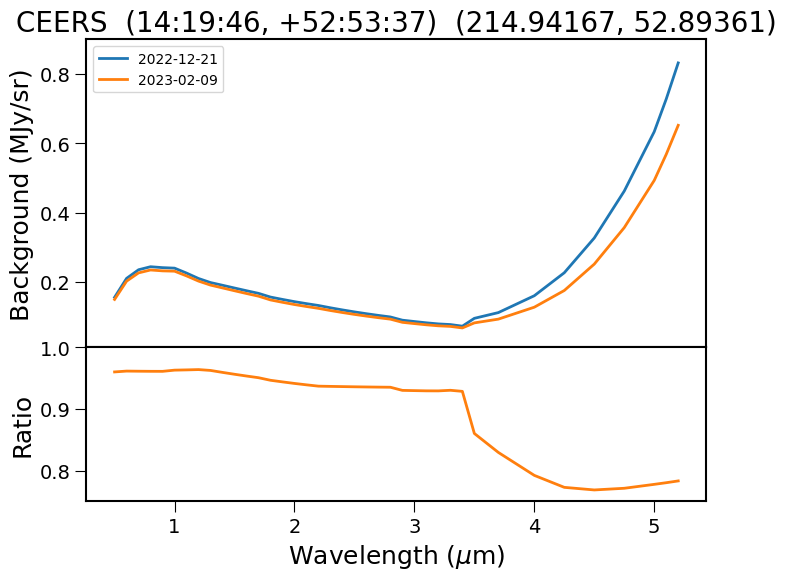

In [14]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True, gridspec_kw={'height_ratios': [2, 1]})
plt.subplots_adjust(hspace=0, wspace=0)
ax1.set_title(plot_title)

ax1.plot(wavelength[lam_NIRSpec], background_data['total_bg'][i1_day][lam_NIRSpec], label=date1.strftime('%Y-%m-%d'))
ax1.plot(wavelength[lam_NIRSpec], background_data['total_bg'][i2_day][lam_NIRSpec], label=date2.strftime('%Y-%m-%d'))

ax1.legend()
ax1.set_ylabel('Background (MJy/sr)')
ax1.set_ylim(0.01, 0.9)

ax2.plot(wavelength[lam_NIRSpec], 
         background_data['total_bg'][i2_day][lam_NIRSpec] / background_data['total_bg'][i1_day][lam_NIRSpec], 
         color='C1')

ax2.set_ylim(0.75, 1)
ax2.set_ylabel('Ratio')

plt.xlabel('Wavelength ($\mu$m)')

plt.savefig('background_vs_wavelength.png')